In [2]:
import os
import numpy as np
import pandas as pd
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.applications import DenseNet121, ResNet50
from tensorflow.keras.models import Model

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
root = '/kaggle/input/140k-real-and-fake-faces'

train_dir = '/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/train'
val_dir = '/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/valid'
test_dir = '/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/test'

In [3]:
print("Train_dir Subfolders: ", os.listdir(train_dir))
print("Valid_dir Subfolders: ", os.listdir(val_dir))
print("Test_dir Subfolders: ", os.listdir(test_dir))

Train_dir Subfolders:  ['fake', 'real']
Valid_dir Subfolders:  ['fake', 'real']
Test_dir Subfolders:  ['fake', 'real']


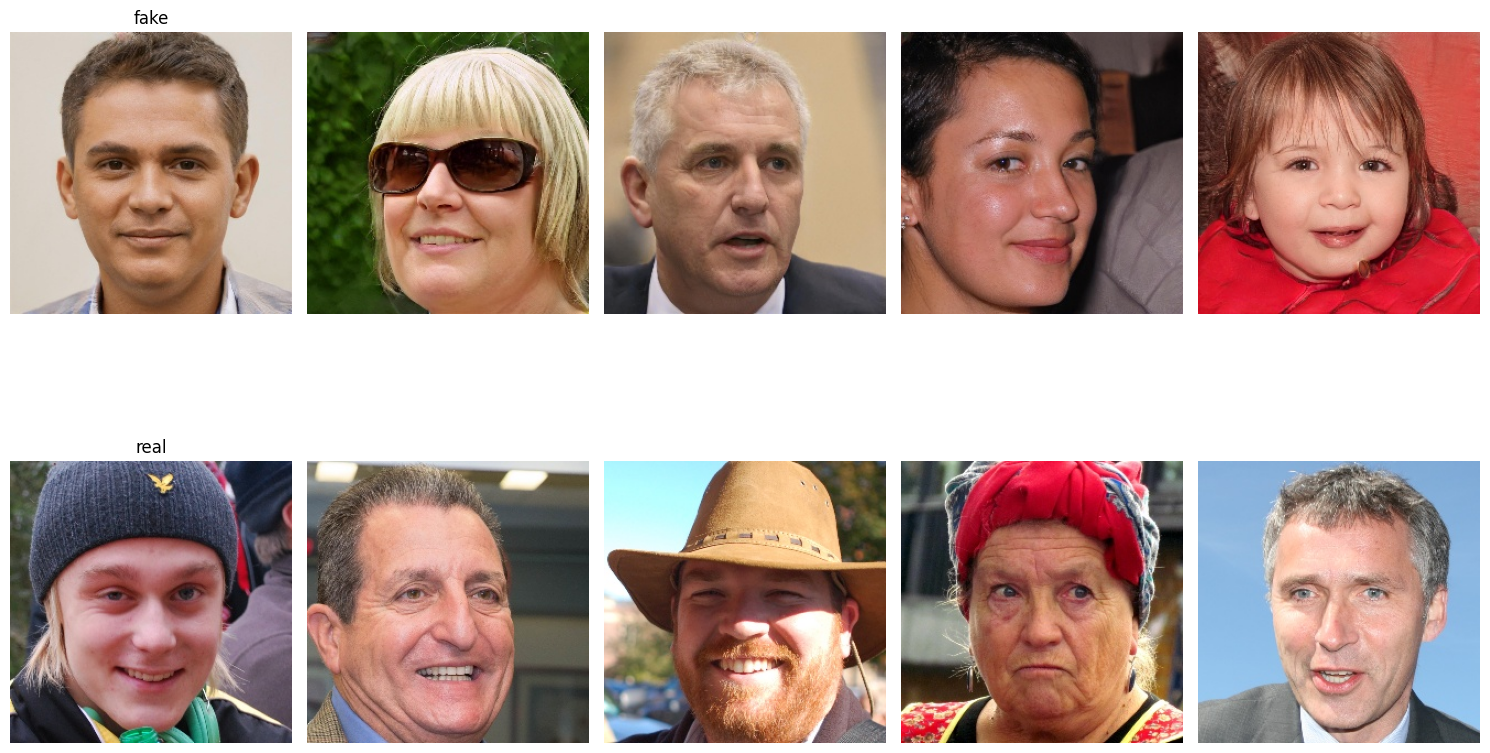

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define class names
class_names = ['fake', 'real']
num_images = 5

plt.figure(figsize=(15, 10))

# Plot sample images from training directory
for i, class_name in enumerate(class_names):
    class_dir = os.path.join(train_dir, class_name)
    images = os.listdir(class_dir)
    
    # Plot title for the class
    plt.subplot(len(class_names), num_images, i * num_images + 1)
    plt.title(class_name)
    plt.axis('off')
    
    # Plot sample images
    for j in range(num_images):
        img_path = os.path.join(class_dir, images[j])
        img = mpimg.imread(img_path)
        plt.subplot(len(class_names), num_images, i * num_images + j + 1)
        plt.imshow(img)
        plt.axis('off')

plt.tight_layout()
plt.show()


In [5]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_test_datagen = ImageDataGenerator(rescale=1./255)
target_size = (256,256)
batch_size = 32  # Update this according to your batch size

# Load data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary'
)


test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  # Ensure test data is not shuffled
)

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [6]:
# Verify class distribution
print("Training class distribution:", train_generator.class_indices)
print("Validation class distribution:", val_generator.class_indices)

Training class distribution: {'fake': 0, 'real': 1}
Validation class distribution: {'fake': 0, 'real': 1}


In [7]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(256, activation='relu'),
    #Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    29,491,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,584,961 (112.86 MB)

 Trainable params: 29,584,961 (112.86 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10  # Adjust as needed
)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1724407469.329968     107 service.cc:145] XLA service 0x79a67c0045a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1724407469.330032     107 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1724407469.330036     107 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


   2/3125 ━━━━━━━━━━━━━━━━━━━━ 2:59 57ms/step - accuracy: 0.4375 - loss: 2.8349  

I0000 00:00:1724407475.751002     107 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3125/3125 ━━━━━━━━━━━━━━━━━━━━ 818s 259ms/step - accuracy: 0.7012 - loss: 0.5709 - val_accuracy: 0.8912 - val_loss: 0.2582
Epoch 2/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 315s 101ms/step - accuracy: 0.9160 - loss: 0.2068 - val_accuracy: 0.9400 - val_loss: 0.1511
Epoch 3/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 263s 84ms/step - accuracy: 0.9678 - loss: 0.0855 - val_accuracy: 0.9528 - val_loss: 0.1335
Epoch 4/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 267s 85ms/step - accuracy: 0.9847 - loss: 0.0427 - val_accuracy: 0.9456 - val_loss: 0.1756
Epoch 5/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 258s 82ms/step - accuracy: 0.9899 - loss: 0.0284 - val_accuracy: 0.9567 - val_loss: 0.1426
Epoch 6/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 252s 81ms/step - accuracy: 0.9919 - loss: 0.0227 - val_accuracy: 0.9573 - val_loss: 0.1660
Epoch 7/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 251s 80ms/step - accuracy: 0.9933 - loss: 0.0186 - val_accuracy: 0.9588 - val_loss: 0.1491
Epoch 8/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 250s 80ms/step - accuracy: 0.9946 - 

In [10]:
test_metrics = model.evaluate(test_generator)
print("Test metrics:", test_metrics[1])

625/625 ━━━━━━━━━━━━━━━━━━━━ 141s 226ms/step - accuracy: 0.9561 - loss: 0.2171
Test metrics: 0.9566500186920166


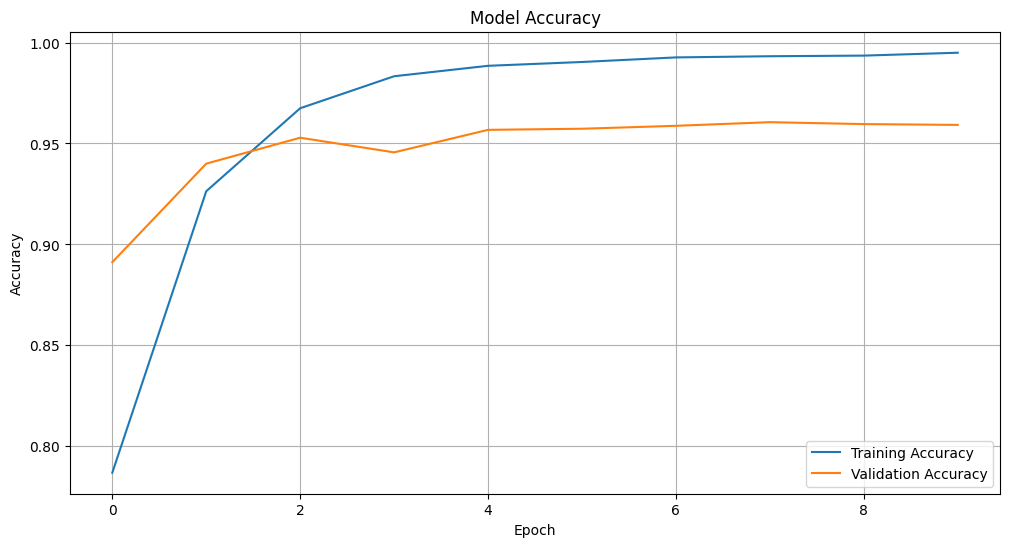

In [11]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

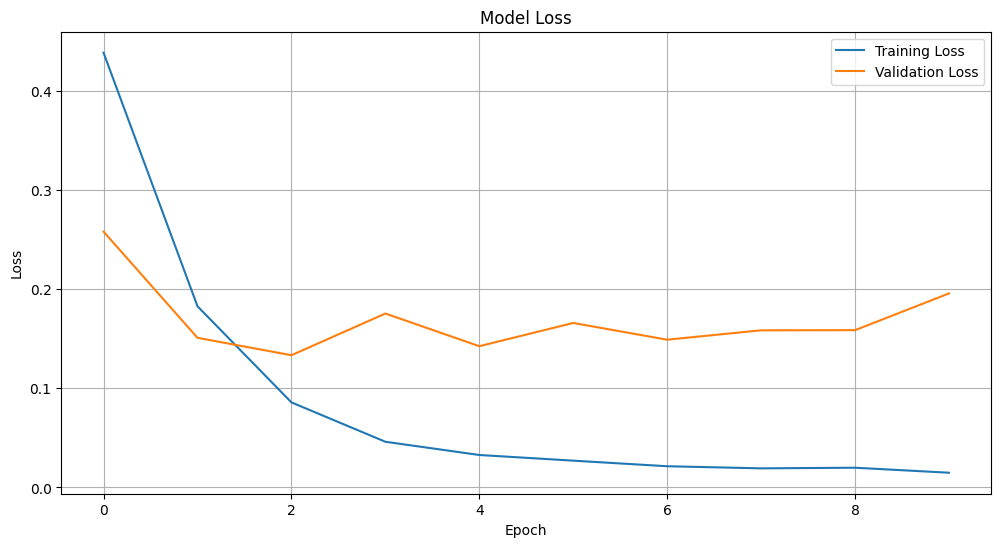

In [12]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [13]:
# Generate predictions on the test set
test_generator.reset()
predictions = model.predict(test_generator, verbose=1)

# The model output is the probability of the image being real
# Convert probabilities to percentage
predicted_percentages = predictions * 100

# Convert to predicted classes with a threshold of 50%
predicted_classes = np.where(predicted_percentages > 50, 1, 0)

# Get true labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Print the classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step
              precision    recall  f1-score   support

        fake       0.96      0.96      0.96     10000
        real       0.96      0.96      0.96     10000

    accuracy                           0.96     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.96      0.96      0.96     20000



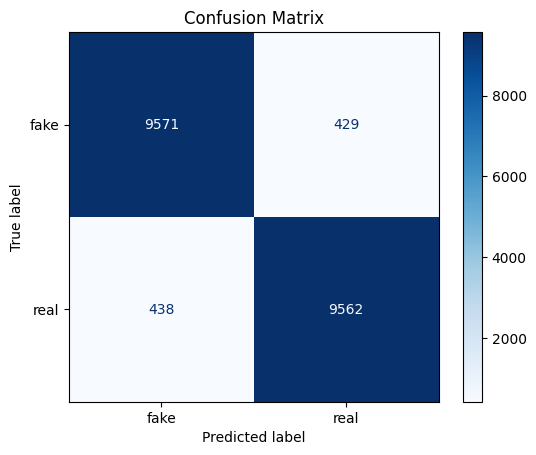

In [14]:
# 3. Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# 4. Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step


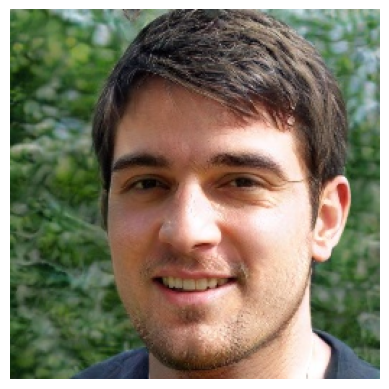

The model predicts this image is 'real' with a confidence of 0.00%.
The model predicts this image is 'fake' with a confidence of 100.00%.


In [15]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

# Function to load and preprocess the image
def load_and_preprocess_image(img_path, target_size):
    # Load image
    img = image.load_img(img_path, target_size=target_size)
    
    # Convert image to array
    img_array = image.img_to_array(img)
    
    # Rescale the image
    img_array = img_array / 255.0
    
    # Expand dimensions to match the input shape
    img_array = np.expand_dims(img_array, axis=0)
    
    return img, img_array

# Provide the path to your image
img_path = '/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/test/fake/01050DBM3C.jpg'
target_size = (256, 256)  # Make sure this matches your model's input size

# Load and preprocess the image
img, img_array = load_and_preprocess_image(img_path, target_size)

# Make a prediction
prediction = model.predict(img_array)

# Get the percentage for both classes
real_confidence = prediction[0][0] * 100
fake_confidence = (1 - prediction[0][0]) * 100

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

# Print the results
print(f"The model predicts this image is 'real' with a confidence of {real_confidence:.2f}%.")
print(f"The model predicts this image is 'fake' with a confidence of {fake_confidence:.2f}%.")

## DenseNet121 PRE TRAINED MODEL 

In [7]:
base_model = DenseNet121(weights='imagenet',include_top=False,input_shape=(256,256,3))

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [17]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model2 = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False
    
model2.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])


In [18]:
history2 = model2.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1724430216.421321     280 service.cc:145] XLA service 0x7e348400dae0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1724430216.421378     280 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1724430216.421382     280 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


   1/3125 ━━━━━━━━━━━━━━━━━━━━ 26:56:01 31s/step - accuracy: 0.6250 - loss: 0.6723

I0000 00:00:1724430232.041893     280 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3125/3125 ━━━━━━━━━━━━━━━━━━━━ 1207s 376ms/step - accuracy: 0.7874 - loss: 0.4524 - val_accuracy: 0.8512 - val_loss: 0.3361
Epoch 2/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 410s 131ms/step - accuracy: 0.8542 - loss: 0.3292 - val_accuracy: 0.8741 - val_loss: 0.2916
Epoch 3/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 349s 111ms/step - accuracy: 0.8811 - loss: 0.2826 - val_accuracy: 0.8777 - val_loss: 0.2824
Epoch 4/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 373s 119ms/step - accuracy: 0.8935 - loss: 0.2494 - val_accuracy: 0.8892 - val_loss: 0.2593
Epoch 5/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 351s 112ms/step - accuracy: 0.9070 - loss: 0.2253 - val_accuracy: 0.8905 - val_loss: 0.2593
Epoch 6/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 341s 109ms/step - accuracy: 0.9117 - loss: 0.2106 - val_accuracy: 0.8722 - val_loss: 0.2984
Epoch 7/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 363s 116ms/step - accuracy: 0.9208 - loss: 0.1935 - val_accuracy: 0.8942 - val_loss: 0.2671
Epoch 8/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 332s 106ms/step - accuracy: 0.

In [19]:
test_metrics2 = model2.evaluate(test_generator)
print("Test metrics:", test_metrics2[1])

625/625 ━━━━━━━━━━━━━━━━━━━━ 219s 351ms/step - accuracy: 0.9277 - loss: 0.1818
Test metrics: 0.9036499857902527


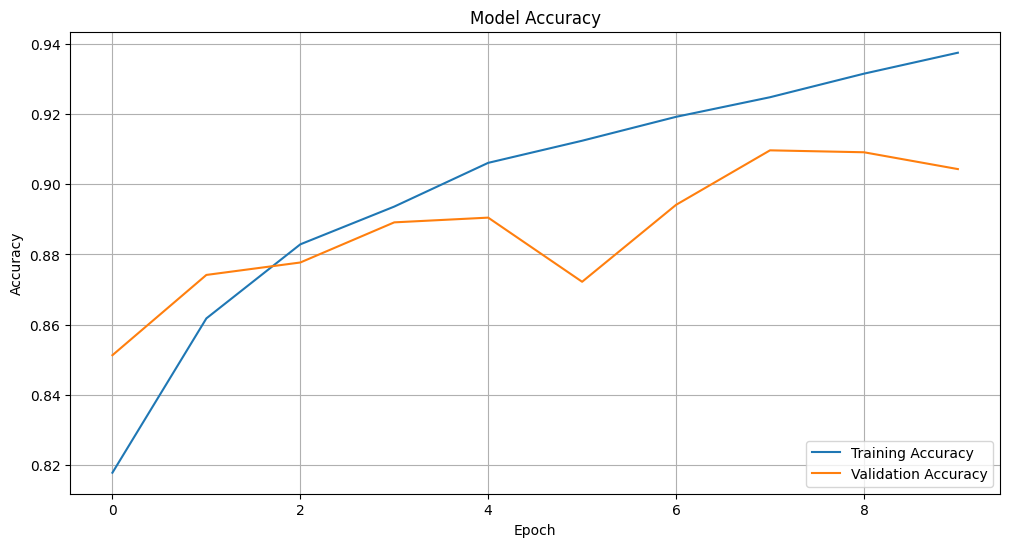

In [20]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

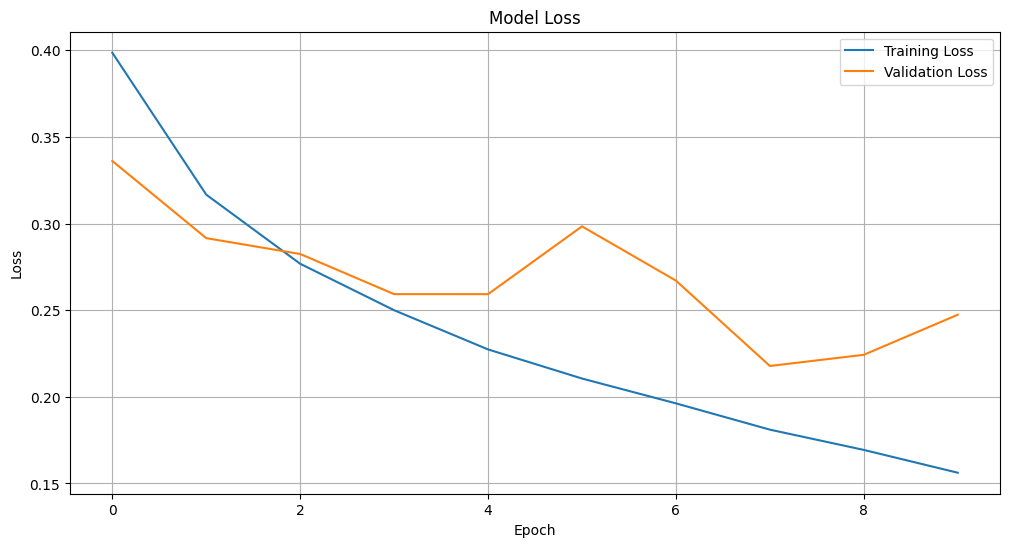

In [21]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [22]:
# Generate predictions on the test set
test_generator.reset()
predictions = model2.predict(test_generator, verbose=1)

# The model output is the probability of the image being real
# Convert probabilities to percentage
predicted_percentages = predictions * 100

# Convert to predicted classes with a threshold of 50%
predicted_classes = np.where(predicted_percentages > 50, 1, 0)

# Get true labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Print the classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

625/625 ━━━━━━━━━━━━━━━━━━━━ 61s 86ms/step
              precision    recall  f1-score   support

        fake       0.88      0.94      0.91     10000
        real       0.93      0.87      0.90     10000

    accuracy                           0.90     20000
   macro avg       0.91      0.90      0.90     20000
weighted avg       0.91      0.90      0.90     20000



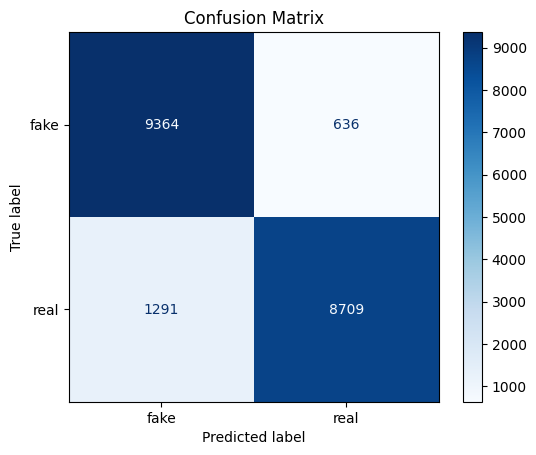

In [24]:
# 3. Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# 4. Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


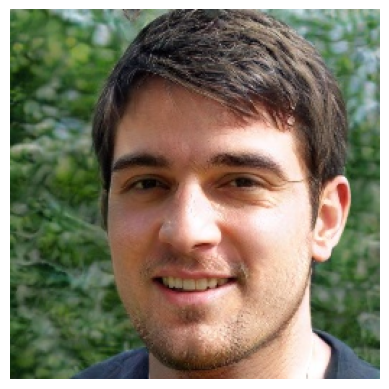

The model predicts this image is 'real' with a confidence of 7.59%.
The model predicts this image is 'fake' with a confidence of 92.41%.


In [25]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

# Function to load and preprocess the image
def load_and_preprocess_image(img_path, target_size):
    # Load image
    img = image.load_img(img_path, target_size=target_size)
    
    # Convert image to array
    img_array = image.img_to_array(img)
    
    # Rescale the image
    img_array = img_array / 255.0
    
    # Expand dimensions to match the input shape
    img_array = np.expand_dims(img_array, axis=0)
    
    return img, img_array

# Provide the path to your image
img_path = '/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/test/fake/01050DBM3C.jpg'
target_size = (256, 256)  # Make sure this matches your model's input size

# Load and preprocess the image
img, img_array = load_and_preprocess_image(img_path, target_size)

# Make a prediction
prediction = model2.predict(img_array)

# Get the percentage for both classes
real_confidence = prediction[0][0] * 100
fake_confidence = (1 - prediction[0][0]) * 100

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

# Print the results
print(f"The model predicts this image is 'real' with a confidence of {real_confidence:.2f}%.")
print(f"The model predicts this image is 'fake' with a confidence of {fake_confidence:.2f}%.")